In [2]:
import torch

from resnet import *

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim

from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## DataLoad Phase

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.ImageNet('G:/data/example', split='train', transform=transform)
#print(type(trainset))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.ImageNet('G:/data/example', split='val', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

### Data check

<class 'torch.utils.data.dataloader.DataLoader'>


  0%|          | 0/80073 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>
(16, 3, 224, 224)


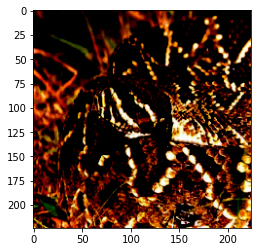

  0%|          | 0/80073 [00:00<?, ?it/s]

label =  tensor(67)


In [4]:
print(type(trainloader))
train_bar = tqdm(trainloader)
for data, target in train_bar:
    data = data.detach().numpy()
    print(type(data))
    print(data.shape)
    plt.imshow(data[1].transpose((1,2,0)))
    plt.show()
    print("label = ",target[1])
    break

## Train phase

In [5]:
#hyper parameter
epochs = 50
lr = 0.0001

#model
model = ResNet50().cuda()

#loss function
criterion = nn.CrossEntropyLoss(reduction='sum').cuda()

#optimizer
optimizer = optim.Adam(model.parameters(), lr= lr)

In [7]:
for epoch in range(epochs):
    #train
    model.train()
    train_bar = tqdm(trainloader)
    cost = 0.0
    n_batches = 0
    for data, target in train_bar:
        #gpu load
        data = data.cuda()
        target = target.cuda()
        
        #gradient init
        optimizer.zero_grad()
        
        #predict
        pred = model(data)
        print(pred)
        print(target)
        print(np.sum(pred==target, axis=1))
        #loss calc
        loss = criterion(pred, target)

        #gradient stack
        loss.backward()
        
        #gradient apply
        optimizer.step()
        
        cost += loss.item()
        n_batches += 1
    
        train_bar.set_description(desc = '[%d/%d]   cost: %.9f' % (
            epoch+1, epochs, cost/n_batches,
        ))
    cost /= n_batches
    print('[Train][Epoch : {:>3}   cost = {:>.9}]'.format(epoch + 1, cost))
    
    #validation
    model.eval()
    with torch.no_grad():
        val_bar = tqdm(testloader)
        cost = 0.0
        n_batches = 0
        for data, target in val_bar:
            data = data.cuda()
            target = target.cuda()
            pred = model(data)
            loss = criterion(pred, target)
            cost += loss.item()
            n_batches += 1
            
            val_bar.set_description(desc = '[%d/%d]   cost: %.9f' % (
            epoch, epochs, cost/n_batches,
            ))
        cost /= n_batches
        print('[Valid][Epoch : {:>3}   cost = {:>.9}]'.format(epoch + 1, cost))
    output_path = 'G:/checkpoints/resnet'
    torch.save(model.state_dict(), output_path + "resnet50_" + str(epoch+1) + ".pt")

  0%|          | 0/80073 [00:00<?, ?it/s]

tensor([[ 0.2145, -0.7183,  0.2012,  ..., -0.2088,  0.0735,  0.9359],
        [ 0.0367, -0.4303, -0.0645,  ..., -0.2449, -0.1889,  0.6015],
        [ 0.0832, -0.3566, -0.0941,  ..., -0.1757, -0.1772,  0.5654],
        ...,
        [ 0.0237, -0.4181, -0.1161,  ..., -0.2257, -0.1269,  0.5392],
        [ 0.0804, -0.3973, -0.1081,  ..., -0.2070, -0.3012,  0.6688],
        [ 0.5367, -0.9673,  0.2619,  ..., -0.2970,  0.0428,  1.2922]],
       device='cuda:0', grad_fn=<AddmmBackward>)
tensor([340, 665, 309,  47, 941, 449, 819,   8, 783, 609, 999, 803, 712, 389,
        109, 683], device='cuda:0')


RuntimeError: The size of tensor a (1000) must match the size of tensor b (16) at non-singleton dimension 1

path existence check

In [ ]:
import os
os.path.exists('G:/data/imagenet2')

In [ ]:
print(torch.cuda.is_available())